# <center> <div style="background: linear-gradient(35deg, #3d85c6, #FFFF8F, #36454F, #AFE1AF, #e34262); padding: 10px; border-radius: 50px; color: white;">🏆 𝐎𝐥𝐲𝐦𝐩𝐢𝐜𝐬: 𝐄𝐱𝐩𝐥𝐨𝐫𝐚𝐭𝐨𝐫𝐲 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 🏆</div></center>
<img src="olympics_poster_2.jpg" >
<br>

<a id='top'></a>

## <div style="background-color: #E6F1FF; padding: 10px; border-radius: 50px; width: 305px;">𝐓𝐚𝐛𝐥𝐞 𝐨𝐟 𝐂𝐨𝐧𝐭𝐞𝐧𝐭𝐬 :</div>


- [1. Introduction](#intro)
- [2. Importing Libraries](#lib)
- [3. Uploading Data Files](#data)
- [4. Processing Data](#process)
- [5. Analysis and Inferences](#analysis)
    - [5.1 Primary analysis](#basic)
    - [5.2 Medals statistics](#medal)
        - [5.2.1 Top 5 Countries of All Time](#t5)
    - [5.3 Participation trend over the years](#participation)
    - [5.4 Top performers in each Olympics](#top_perf)
    - [5.5 Trend analysis of events held](#event)
    - [5.6 Popularity of Olympics](#popular)
        - [5.6.1 Country wise Trend](#country)
        - [5.6.2 Gender wise Trend](#gender)
    - [5.7 India at Olympics](#ind)
        - [5.7.1 Medals Analysis](#won)
        - [5.7.2 Age Distribution wrt Sport](#age)
        - [5.7.3 Gender wise Participation](#ind_gen)
    - [5.8 Word Clouds](#wc)
- [6. Conclusion](#end)

## <a id='intro'></a><div style="background-color: #E6F1FF; padding: 10px; border-radius: 50px; width: 250px;"> 𝟏. 𝐈𝐧𝐭𝐫𝐨𝐝𝐮𝐜𝐭𝐢𝐨𝐧</div>

### Welcome to a deep dive into the history and intricacies of the Summer Olympics (1896-2016)! <br>
<img src="https://www.shutterstock.com/image-vector/summer-olympic-games-paris-2024-260nw-2403044435.jpg" width = 1400>
<br>
 <br>
The Olympic Games, is a prestigious international sporting event held every four years. The event brings together athletes from various nations to compete in a wide range of sports and disciplines.The Olympics, held every four years, transcend borders, bringing athletes from diverse nations to showcase their talents on a global stage. This notebook explores the evolution, milestones, and trends of the <b>Summer Olympics</b>, highlighting the event's role in promoting unity, peace, and athletic excellence.
<br> <br>
𝑵𝑶𝑻𝑬- Use the provided anchor tag (🔝) to navigate to the top of each section effortlessly.

## <p style="text-align: right">[🔝](#top)</p>
<a id='lib'></a>
## <div style="background-color: #E6F1FF; padding: 10px; border-radius: 50px; width: 360px;"> 𝟐. 𝐈𝐦𝐩𝐨𝐫𝐭𝐢𝐧𝐠 𝐋𝐢𝐛𝐫𝐚𝐫𝐢𝐞𝐬</div>

In [1]:
import numpy as np                          
import pandas as pd                         

import seaborn as sns   
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
import matplotlib.pyplot as plt            
%matplotlib inline
# import plotly.express as px                 
# import plotly.graph_objects as go           
# import plotly.figure_factory as ff          
# import plotly.offline as pyo   
# pyo.init_notebook_mode(connected=True)      
# import plotly.io as pio
# pio.renderers.default = 'notebook'

from wordcloud import WordCloud

from PIL import Image

import warnings                          
warnings.filterwarnings("ignore")

print("✅ Libraries Imported Successfully")


✅ Libraries Imported Successfully


## <p style="text-align: right">[🔝](#top)</p>
<a id='data'></a>
## <div style="background-color: #E6F1FF; padding: 10px; border-radius: 50px; width: 270px;">𝟑. 𝐑𝐞𝐚𝐝𝐢𝐧𝐠 𝐃𝐚𝐭𝐚</div> 

In [2]:
# we will be combining the following datasets for our analysis
df = pd.read_csv("Athlete_Events.csv")                           # main dataset
noc = pd.read_csv("NOC_regions.csv")                             # for accurate 'region'

In [3]:
# random 3 rows
df.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
118635,60019,Kim Jae-Yeon,M,21.0,178.0,77.0,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Water Polo,Water Polo Men's Water Polo,NaN
93483,47318,Martin Heinze,M,21.0,172.0,73.0,Germany,GER,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Freestyle",NaN
90106,45660,Phaisan Hansawong,M,18.0,165.0,62.0,Thailand,THA,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Featherweight,NaN


In [4]:
# detailed information of each column - dtype, non-null values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
# descriptive statistics of numeric columns
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
# rows and columns size
df.shape

(271116, 15)

In [7]:
# random 3 rows of NOC (region data)
noc.sample(3)

,NOC,region,notes
52,CUB,Cuba,NaN
199,THA,Thailand,NaN
222,VNM,Vietnam,NaN


## <p style="text-align: right">[🔝](#top)</p>
<a id='process'></a>
## <div style="background-color: #E6F1FF; padding: 10px; border-radius: 50px; width: 310px;">𝟒. 𝐏𝐫𝐨𝐜𝐞𝐬𝐬𝐢𝐧𝐠 𝐃𝐚𝐭𝐚</div>

In [8]:
# joining the two datasets on 'NOC' 
df = df.merge(noc, on="NOC", how="left")

In [9]:
# filtering data since we will only be doing analysis on summer olympics
df = df[df['Season']=="Summer"]

In [10]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [11]:
# dropping unnecessary column
df.drop(columns='notes', inplace=True)

In [12]:
# renaming column 'region' to 'Country'
df.rename(columns={'region': 'Country'}, inplace=True)

In [13]:
# dropping duplicate values
df.duplicated().sum()

1385

In [14]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [15]:
# checking for null values
missing_data_df = pd.DataFrame({
    'Count': df.isnull().sum(),
    'Percentage': round((df.isnull().sum() * 100 / len(df)), 2).values
})

# Displaying the table
print(missing_data_df)

          Count  Percentage
ID            0        0.00
Name          0        0.00
Sex           0        0.00
Age        9030        4.08
Height    50500       22.83
Weight    52506       23.74
Team          0        0.00
NOC           0        0.00
Games         0        0.00
Year          0        0.00
Season        0        0.00
City          0        0.00
Sport         0        0.00
Event         0        0.00
Medal    187090       84.59
Country     370        0.17


<div style="border: 2px solid #333; padding: 15px; margin: 10px 0;">
  <h3>Insights so far:</h3>
  <ul>
    <li>The data is easy to understand.</li>
    <li>Most of the columns will be helpful in analyzing the data.</li>
    <li>The data type of each column is appropriate.</li>
    <li>The <strong>"Medal"</strong> field has many null values. This is due to the fact that not every player has won a place.</li>
  </ul>
</div>


In [16]:
# adding 3 new columns from 'Medal'- Gold, Silver, Bronze
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
26,False,False,False
...,...,...,...
271106,False,False,False
271107,False,False,False
271108,False,False,False
271109,False,False,False


In [17]:
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [18]:
# new df shape
df.shape

(221167, 19)

# <p style="text-align: right">[🔝](#top)</p>
<a id='analysis'></a>
## <div style="background-color:#E6F1FF;padding: 10px; border-radius: 50px; width: 440px;">𝟓. 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐚𝐧𝐝 𝐈𝐧𝐟𝐞𝐫𝐞𝐧𝐜𝐞𝐬<div>

## <a id='basic'></a>𝟓.𝟏 𝐏𝐫𝐢𝐦𝐚𝐫𝐲 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬

In [19]:
# years when summer olympics were held
years = df['Year'].unique()
years.sort()

print(f"Olympics were introduced in {years[0]}; since then, {len(years)} summer olympics have been held.")

Olympics were introduced in 1896; since then, 29 summer olympics have been held.


In [20]:
df['City'].nunique()                      # Number of host cities

23

In [21]:
df['Country'].nunique()                   # Number of countries participated so far

205

In [22]:
df['ID'].nunique()                        # Numer of participants so far

116776

# <p style="text-align: right">[🔝](#top)</p>

## <a id='medal'></a>𝟓.𝟐 𝐌𝐞𝐝𝐚𝐥 𝐒𝐭𝐚𝐭𝐢𝐬𝐭𝐢𝐜𝐬 

In [23]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False)

,Gold,Silver,Bronze
NOC,,,
USA,2472,1333,1197
URS,832,635,596
GBR,635,729,620
GER,592,538,649
ITA,518,474,454
...,...,...,...
AHO,0,1,0
LBR,0,0,0
LCA,0,0,0


<div style="border: 2px solid #333; padding: 15px; margin: 10px 0;">
<ul> 
<li> While rechecking values online, it was noticed that the count of medals was not matching.
<li> It seems like each medal earned in a team event was counted separately. <br>
    -----> For example, if India won a gold medal in hockey (a team of 11 plus extras), all the medals would be counted separately instead of one.
<li> To overcome this issue, we'll focus only on a few selected columns and try to remove the duplicated rows to get an accurate medal count.
</div>

In [24]:
df['Year'].min()

1896

In [25]:
# demonstrating the issue
df[(df['NOC']== 'IND') & (df['Medal']=='Gold')].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,False,True,False
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,False,True,False
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,False,True,False
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,False,True,False
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,False,True,False


- Focusing on the top 5 rows, **ID 2699 and ID 2864** won gold medals in **Hockey** at the **1928** Summer Olympics. This should be counted as one medal and not individually. Hence, the medal count is to be corrected.

In [26]:
# Creating a dataframe for the correct medal count

# droping duplicates
medals = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [27]:
medal_tally = medals.groupby('Country').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [28]:
medal_tally['Total']= medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

# <p style="text-align: right">[🔝](#top)</p>
### <a id='t5'></a>𝟓.𝟐.𝟏 𝐓𝐨𝐩 𝟓 𝐂𝐨𝐮𝐧𝐭𝐫𝐢𝐞𝐬 𝐨𝐟 𝐀𝐥𝐥 𝐓𝐢𝐦𝐞

In [29]:
top5 = medal_tally.head()
top5

,Country,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777


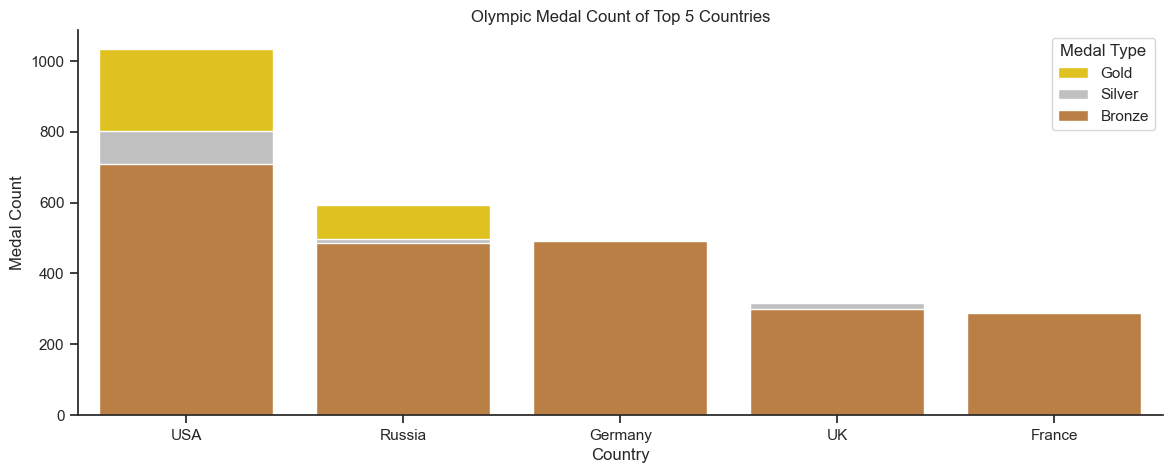

In [30]:
plt.figure(figsize=(14, 5))
sns.barplot(x='Country', y='Gold', data=top5, color='gold', label='Gold')
sns.barplot(x='Country', y='Silver', data=top5, color='silver', label='Silver')
sns.barplot(x='Country', y='Bronze', data=top5, color='#cd7f32', label='Bronze')  

plt.title('Olympic Medal Count of Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.legend(title='Medal Type')

plt.show()

# <p style="text-align: right">[🔝](#top)</p>

## <a id='participation'></a>𝟓.𝟑 𝐏𝐚𝐫𝐭𝐢𝐜𝐢𝐩𝐚𝐭𝐢𝐨𝐧 𝐭𝐫𝐞𝐧𝐝 𝐨𝐯𝐞𝐫 𝐭𝐡𝐞 𝐲𝐞𝐚𝐫𝐬

In [31]:
# participation of countries wrt year
nations_over_time = df.drop_duplicates(['Year', 'Country'])['Year'].value_counts().reset_index(name='Nations Participated').sort_values('Year')
nations_over_time.head(3)

,Year,Nations Participated
28,1896,12
22,1900,31
27,1904,14


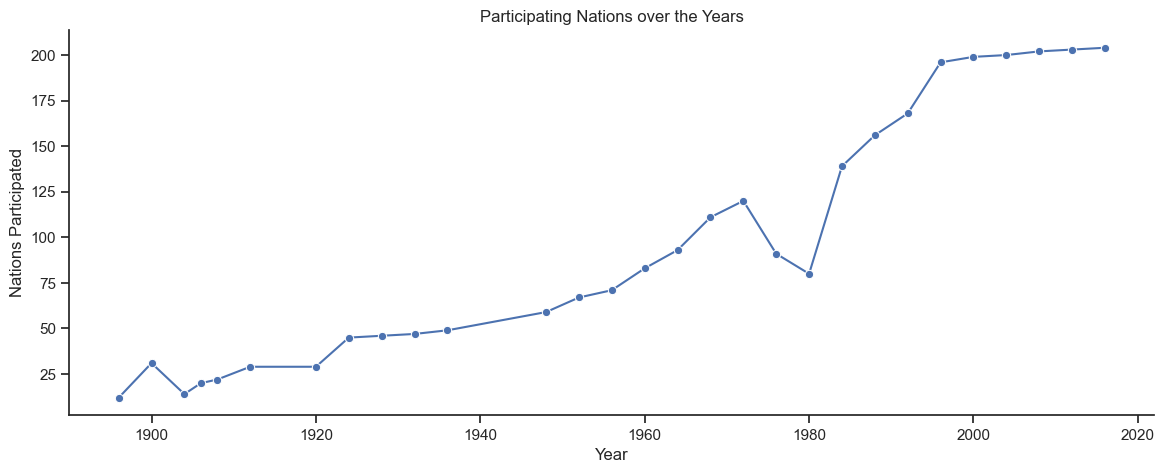

In [32]:
plt.figure(figsize=(14, 5))
sns.lineplot(x='Year', y='Nations Participated', data=nations_over_time, marker='o')

plt.title('Participating Nations over the Years')
plt.xlabel('Year')
plt.ylabel('Nations Participated')

# Show the plot
plt.show()

<div style="border: 2px solid #333; padding: 15px; margin: 10px 0;">
<ul> 
<li> With a humble beginning of only 12 teams participating in 1896, the Olympics has evolved into a global phenomenon, attracting the participation of more than 200 teams in the 2016 edition. Over the years, the Games have gained immense fame, becoming a symbol of international unity, athletic excellence, and cultural diversity.

<li> There is a dip in the participation trend line because in the year 1980, when the Olympics were held in Moscow, many countries boycotted the games due to Russia's attack on Afghanistan.
</div>

# <p style="text-align: right">[🔝](#top)</p>

## <a id='top_perf'></a>𝟓.𝟒 𝐓𝐨𝐩 𝐩𝐞𝐫𝐟𝐨𝐫𝐦𝐞𝐫𝐬 𝐢𝐧 𝐞𝐚𝐜𝐡 𝐄𝐝𝐢𝐭𝐢𝐨𝐧

In [33]:
won_df = df[(df['Gold']==1) | (df['Silver']==1) | (df['Bronze']==1)]

In [34]:
won_df['Total'] = won_df['Gold']+won_df['Silver']+won_df['Bronze']
won_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver,Total
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,False,True,False,True
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,True,False,False,True
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,True,False,False,True
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,True,False,False,True
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,False,True,False,True


In [35]:
top_player_by_edition = won_df.groupby(['Name','Year'])['Total'].sum().sort_values(ascending=False).reset_index()

In [36]:
# top player by edition
top = top_player_by_edition.drop_duplicates(subset='Year').sort_values(by='Year')

In [37]:
top.groupby('Name')['Year'].count().sort_values(ascending=False).reset_index(name='Count').head()

,Name,Count
0,"Michael Fred Phelps, II",4
1,Larysa Semenivna Latynina (Diriy-),2
2,Aleksey Yuryevich Nemov,2
3,Aleksandr Nikolayevich Dityatin,1
4,Lloyd Spencer Spooner,1


- **Larysa Semenivna Latynina, Aleksey Yuryevich Nemov**, and **Michael Fred Phelps** have all set outstanding performances in multiple editions.

<table align='center'>
  <tr>
    <td>
      <img src="https://m.media-amazon.com/images/M/MV5BMTNiZmJlNmYtYjhiOS00NGViLTliYjQtM2U1Y2I2NGE5YmJmXkEyXkFqcGdeQXVyNDUzOTQ5MjY@._V1_.jpg" alt="Larysa Semenivna Latynina" style="width: 300px; height: 300px;">
      <p align="center">Larysa Semenivna Latynina</p>
    </td>
    <td>
      <img src="https://i.pinimg.com/474x/bc/75/33/bc753300b55fcf25954f9ef2eaec847b.jpg" alt="Aleksey Yuryevich Nemov" style="width: 300px; height: 300px;">
      <p align="center">Aleksey Yuryevich Nemov</p>
    </td>
    <td>
      <img src="https://miro.medium.com/v2/resize:fit:426/1*8m7upCR1c-sDcyVA-kZBJg@2x.jpeg" alt="Michael Fred Phelps" style="width: 300px; height: 300px;">
      <p align="center">Michael Fred Phelps</p>
    </td>
  </tr>
</table>


# <p style="text-align: right">[🔝](#top)</p>

## <a id='event'></a>𝟓.𝟓 𝐓𝐫𝐞𝐧𝐝 𝐚𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐨𝐟 𝐞𝐯𝐞𝐧𝐭𝐬 𝐡𝐞𝐥𝐝

In [38]:
trend = df.drop_duplicates(['Year', 'Sport', 'Event'])

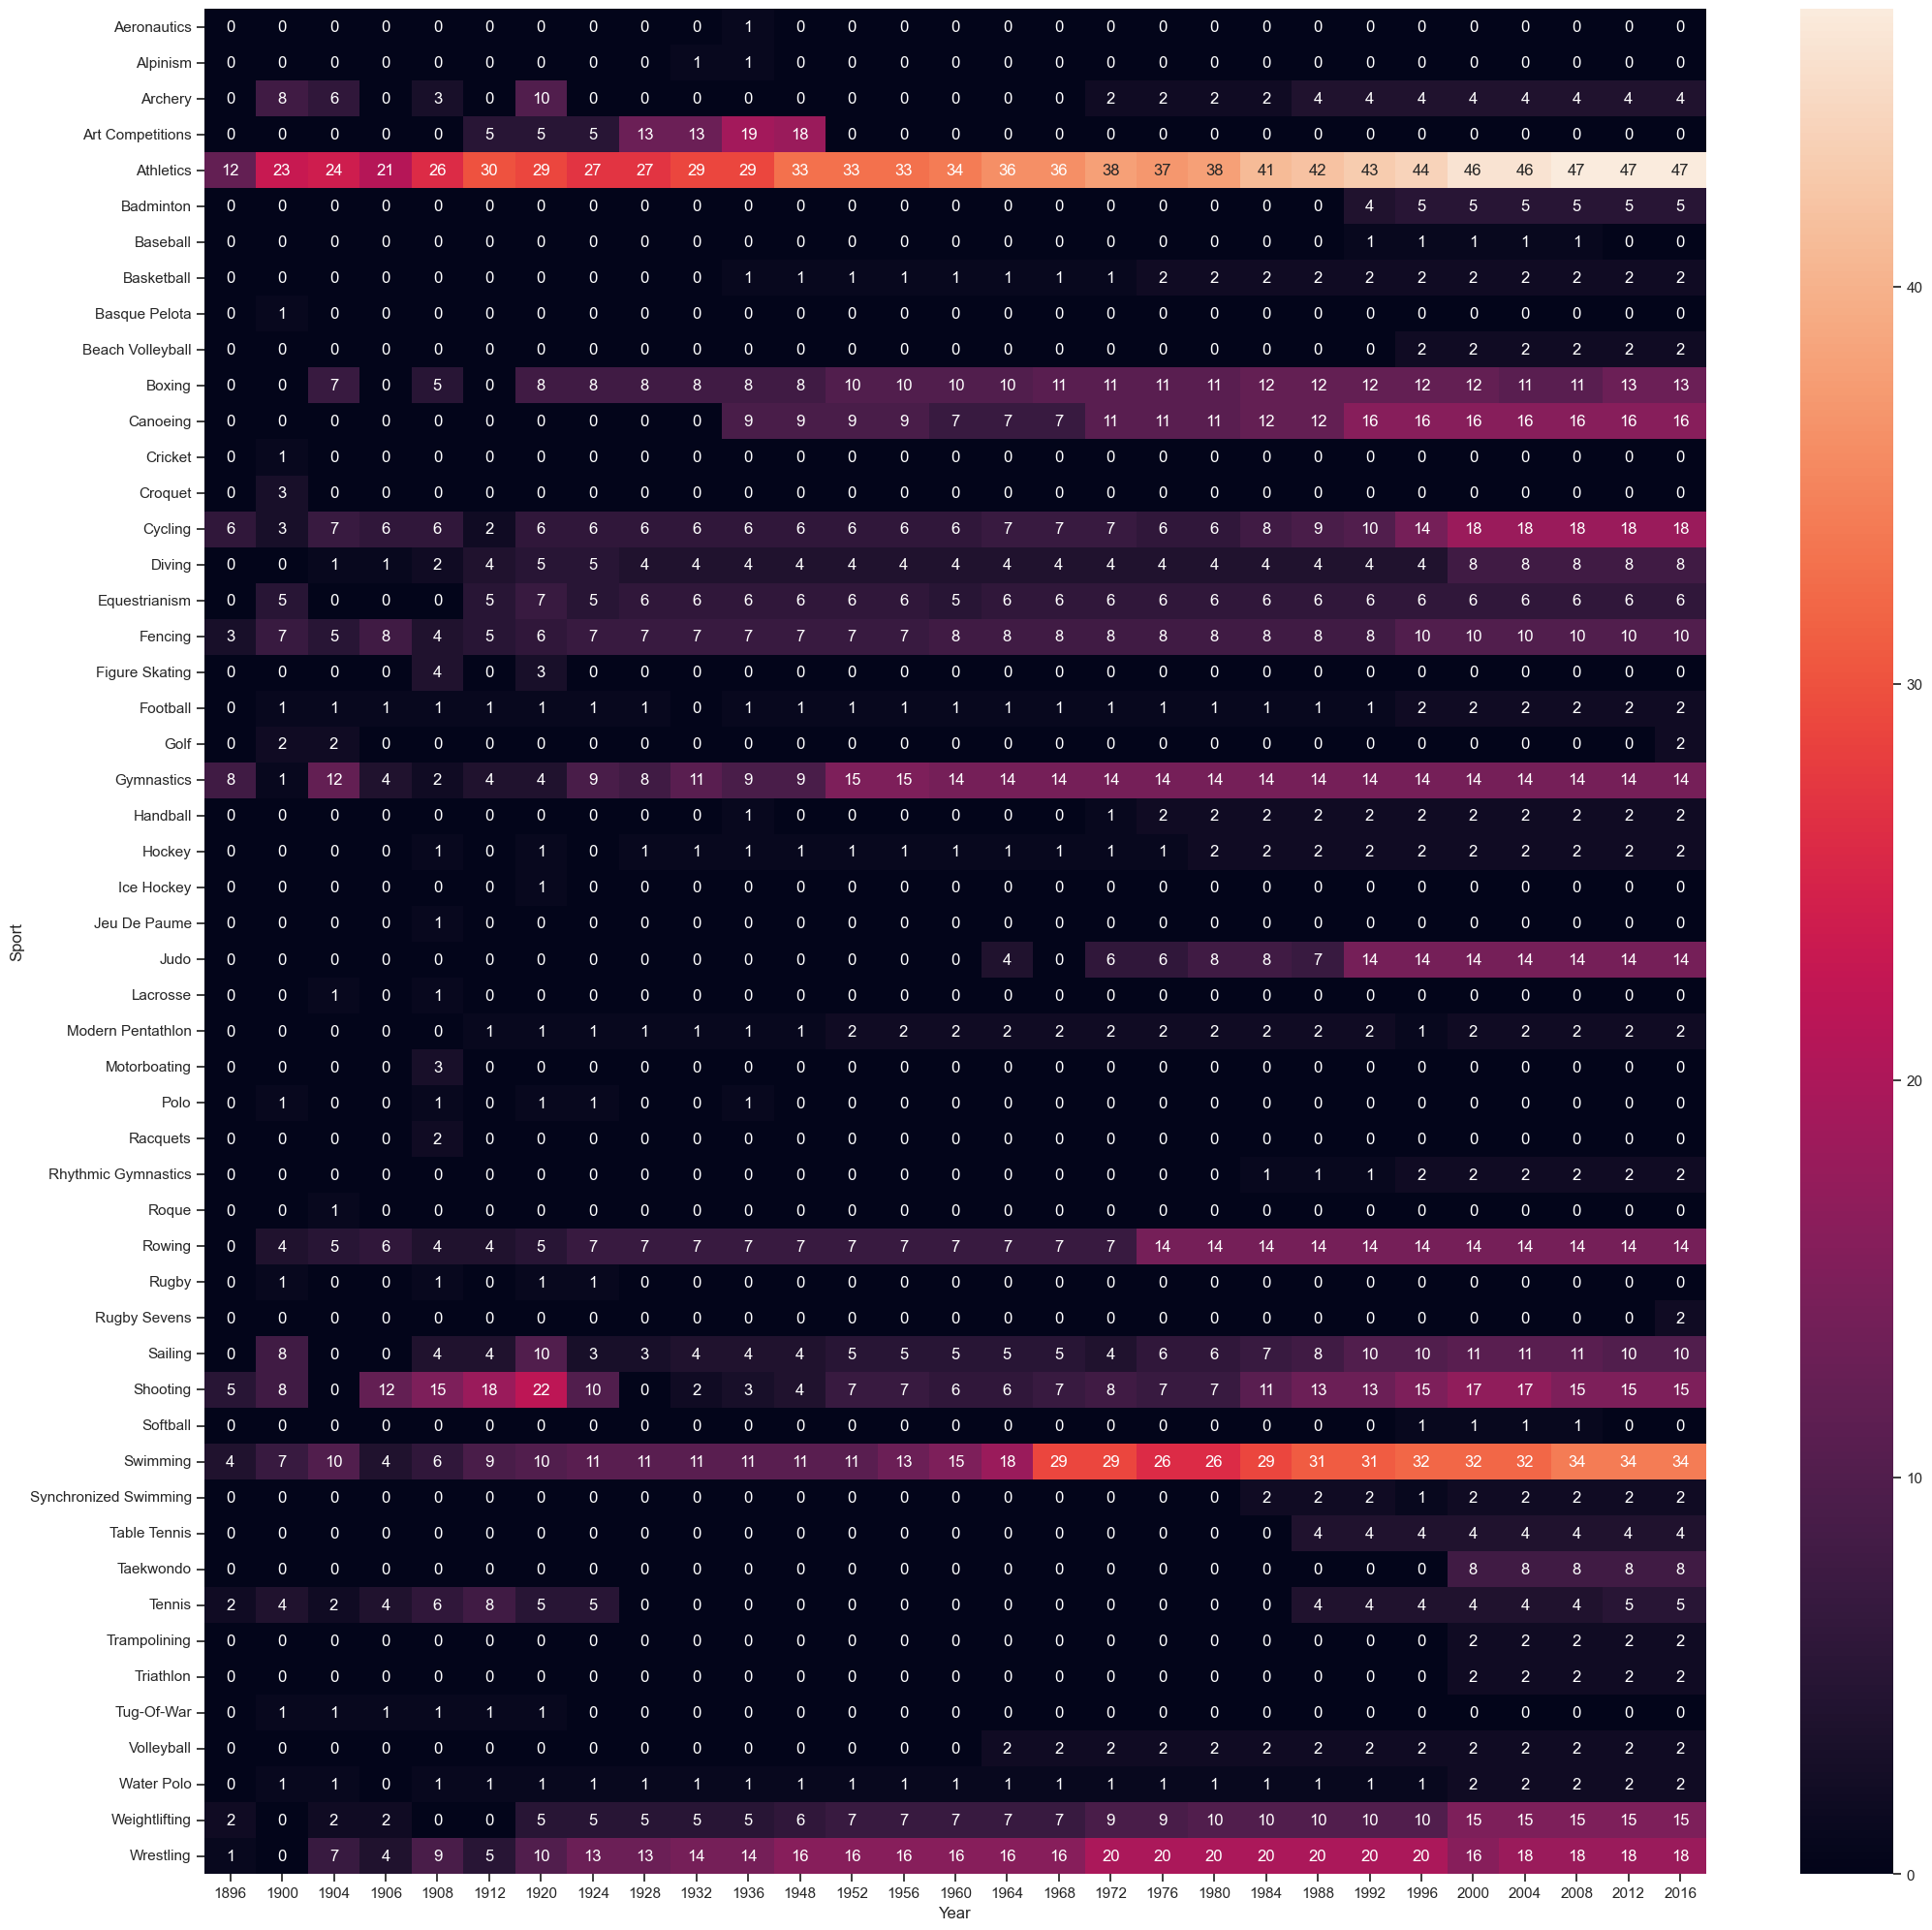

In [39]:
# Creating a heatmap illustrating the distribution of sports events over the years
event = trend.pivot_table(index='Sport', columns="Year", values='Event', aggfunc='count').fillna(0).astype(int)

plt.figure(figsize=(25,25))
sns.heatmap(data=event, annot=True)
plt.show()

- Athletics and Swimming have shown a consistent upward trend over the years, establishing themselves as the most popular and widely participated sports to date.
<br><br>
- Wrestling, weightlifting, shooting, rowing, judo, gymnastics, cycling, canoeing, and boxing are emerging as the next trending sports, gaining increased attention and participation.

# <p style="text-align: right">[🔝](#top)</p>

## <a id='popular'></a>𝟓.𝟔 𝐏𝐨𝐩𝐮𝐥𝐚𝐫𝐢𝐭𝐲 𝐨𝐟 𝐎𝐥𝐲𝐦𝐩𝐢𝐜𝐬

- The Olympics has grown exponentially in popularity, captivating audiences worldwide with its celebration of sport, unity, and the pursuit of athletic excellence.

- Below we'll see Olympics trend wrt country and gender.

In [40]:
Athletes_over_time =  df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')
Athletes_over_time.head(3)

,Year,count
28,1896,43
26,1900,90
25,1904,95


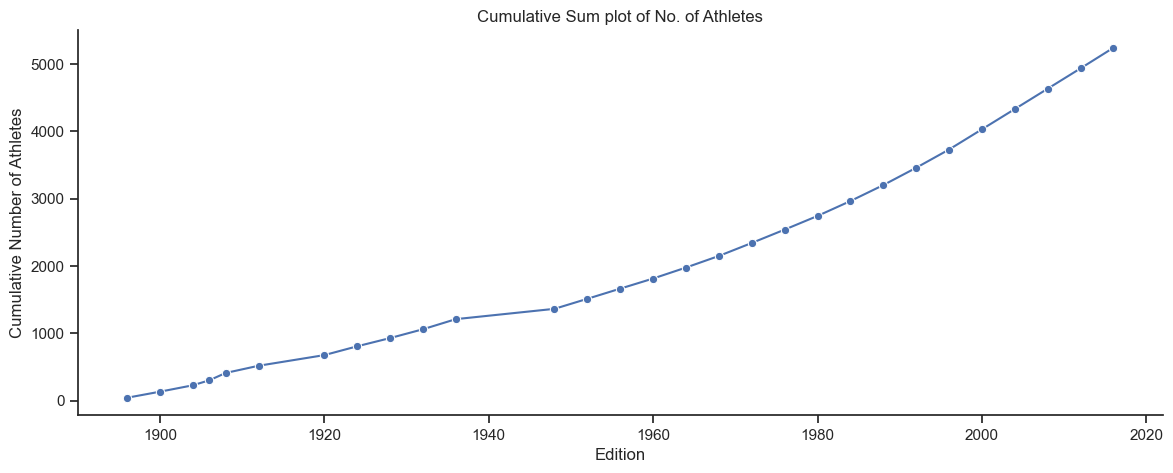

In [41]:
cumulative_sum = Athletes_over_time['count'].cumsum()

plt.figure(figsize=(14, 5))
sns.lineplot(x=Athletes_over_time['Year'], y=cumulative_sum, marker='o')

plt.title('Cumulative Sum plot of No. of Athletes')
plt.xlabel('Edition')
plt.ylabel('Cumulative Number of Athletes')

plt.show()

- The journey began with a modest count of 43 athletes and has now expanded to over 5000 athletes. Olympics has provided deserving athletes with the support and recognition they truly deserve.

# <p style="text-align: right">[🔝](#top)</p>

### <a id='country'></a>𝟓.𝟔.𝟏 𝐂𝐨𝐮𝐧𝐭𝐫𝐲 𝐰𝐢𝐬𝐞 𝐓𝐫𝐞𝐧𝐝

In [42]:
country_df = df.drop_duplicates(subset=['Year', 'Country'])

In [43]:
country_trend = country_df['Country'].value_counts().reset_index(name='Count')

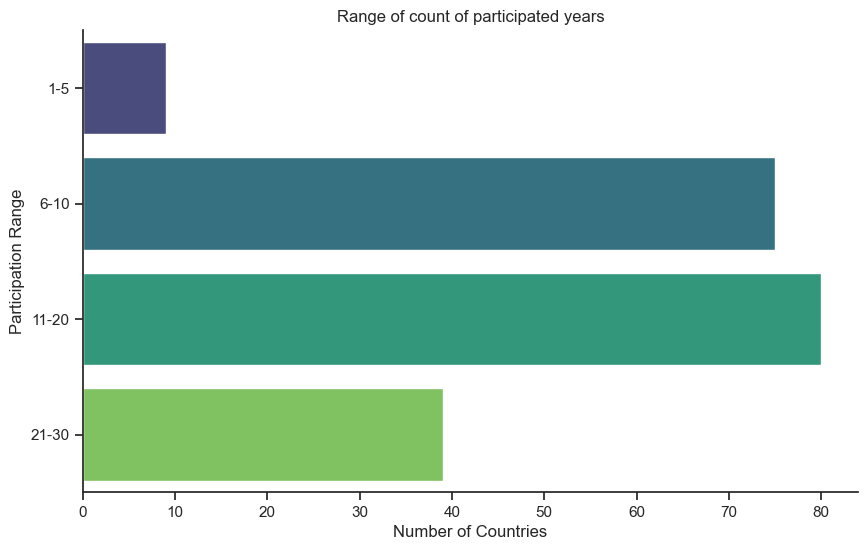

In [44]:
country_trend_sorted = country_trend.sort_values(by='Count', ascending=False)
clubbed_countries = pd.cut(country_trend_sorted['Count'], bins=[1, 5, 10, 20, 30], labels=['1-5', '6-10', '11-20', '21-30'])
country_trend_sorted['Clubbed'] = clubbed_countries

plt.figure(figsize=(10, 6))
sns.countplot(y='Clubbed', data=country_trend_sorted, palette='viridis')
plt.xlabel('Number of Countries')
plt.ylabel('Participation Range')
plt.title('Range of count of participated years')
plt.show()

In [45]:
# Countries which has participated in all the Editions held so far
top_participation = country_trend[country_trend['Count']==29]
top_participation

,Country,Count
0,Switzerland,29
1,Australia,29
2,Greece,29
3,UK,29
4,France,29
5,Italy,29


- Notably, Switzerland, Australia, Greece, the United Kingdom, France, and Italy have demonstrated unwavering commitment to the Summer Olympics by participating in every edition of the event.

# <p style="text-align: right">[🔝](#top)</p>

### <a id='gender'></a>𝟓.𝟔.𝟐 𝐆𝐞𝐧𝐝𝐞𝐫 𝐰𝐢𝐬𝐞 𝐓𝐫𝐞𝐧𝐝

In [46]:
athlete_df = df.drop_duplicates(['Name'])

In [47]:
male_df = athlete_df[athlete_df['Sex']=='M'].groupby('Year')['Name'].count().reset_index(name='No. of Males')

female_df = athlete_df[athlete_df['Sex']=='F'].groupby('Year')['Name'].count().reset_index(name='No. of Females')

In [48]:
gender_df = pd.merge(male_df, female_df).sort_values(by='Year', ascending=True)
gender_df.head(3)

,Year,No. of Males,No. of Females
0,1900,1181,23
1,1904,629,6
2,1906,757,6


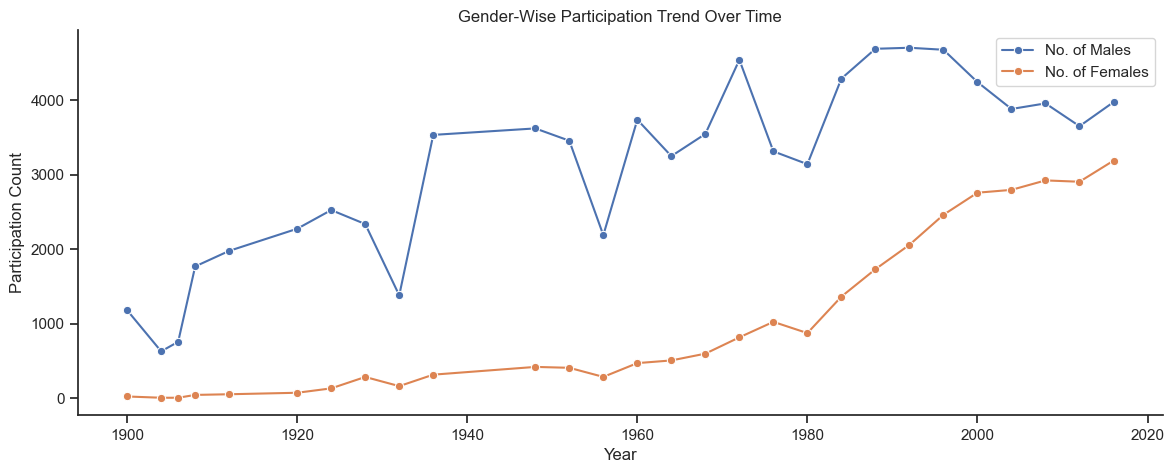

In [49]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=gender_df, x='Year', y='No. of Males', label='No. of Males', marker='o')
sns.lineplot(data=gender_df, x='Year', y='No. of Females', label='No. of Females', marker='o')

plt.xlabel('Year')
plt.ylabel('Participation Count')
plt.title('Gender-Wise Participation Trend Over Time')

plt.show()

- In the early years (1900-1920), there are significant imbalances in gender participation, with a notably higher number of male athletes compared to females

- World War II (1939-1945) appears to have influenced a dip in overall participation, with a subsequent rebound in the post-war years.

- The years 2012 and 2016 stand out as notable for achieving high levels of female participation, suggesting a continued focus on gender inclusivity.

# <p style="text-align: right">[🔝](#top)</p>

## <a id='ind'></a>𝟓.𝟕 𝐈𝐧𝐝𝐢𝐚 𝐚𝐭 𝐎𝐥𝐲𝐦𝐩𝐢𝐜𝐬

<img src="https://media.licdn.com/dms/image/C4D12AQHIgjldMpngmg/article-cover_image-shrink_600_2000/0/1631105903454?e=2147483647&v=beta&t=8DXmo7tvLfwP5-6z2VPQdOUGv-CES4CQ3Gzd-Hn9pPU" width=1500 heigth=500>

In [50]:
# Records of all the medals won by India
India = medals[medals['Country']=='India']

# <p style="text-align: right">[🔝](#top)</p>

### <a id='won'></a>𝟓.𝟕.𝟏 𝐌𝐞𝐝𝐚𝐥𝐬 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬

In [51]:
Ind_medals = India.groupby('Year')['Medal'].count().reset_index()

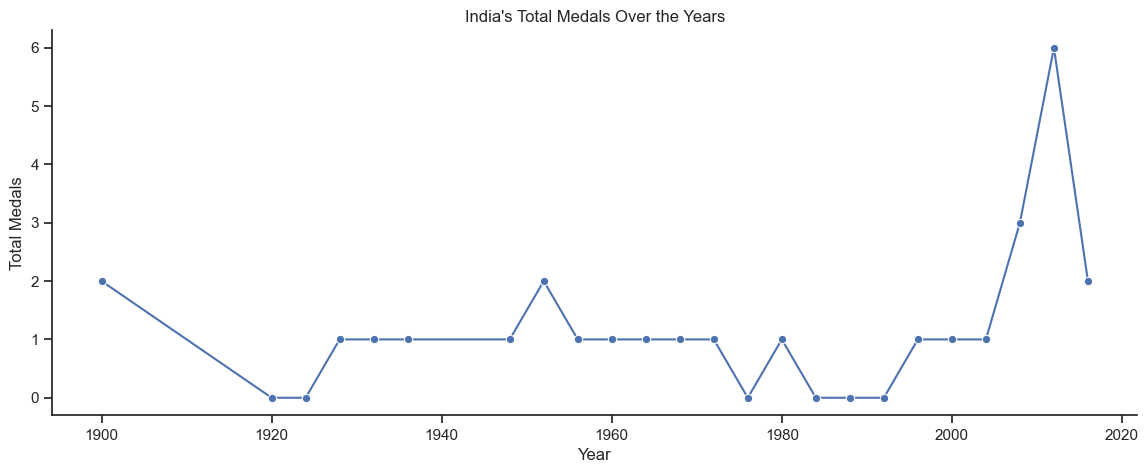

In [52]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=Ind_medals, x='Year', y='Medal', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title("India's Total Medals Over the Years")

plt.show()

In [53]:
medal_ind = medals[(medals['Medal'].notna()) & (medals['Country']=='India')]

medal_ind = medal_ind.groupby(['Sport'])['Medal'].count().reset_index()

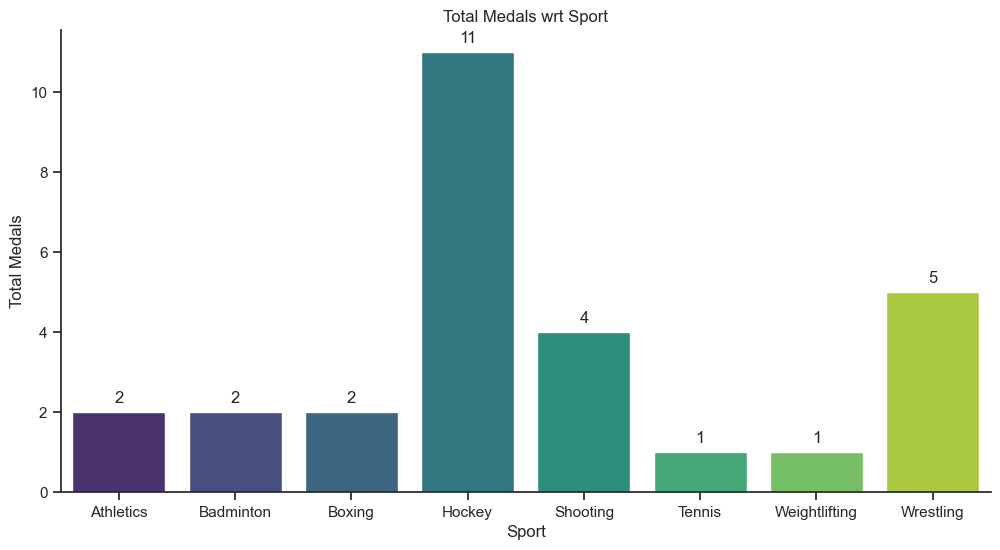

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(data=medal_ind, x='Sport', y='Medal', palette='viridis')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Sport')
plt.ylabel('Total Medals')
plt.title('Total Medals wrt Sport')

plt.show()

<div style="border: 2px solid #333; padding: 15px; margin: 10px 0;">
<ul>
<li> India's golden era in Olympic medals began in 1928, with an impressive haul of 14 medals in field hockey, setting the tone for dominance in subsequent years.
<li> While the majority of India's Olympic medals were earned during the field hockey heydays, the country has demonstrated a consistent presence on the podium, with sporadic wins in other sports like shooting and badminton in more recent years.
<li> The data reflects a decline in medal count during certain periods, such as the single medal in 1996, 2000, and 2004. However, India's athletes showcased resilience, bouncing back with increased medal tallies in subsequent editions, including the 6 medals achieved in 2012.
<li> India's Olympic prowess is on the rise, evident from the impressive records set at the 2020 Olympics. The nation eagerly anticipates the 2024 Paris Olympics, expecting its athletes to build on this success and further elevate India's standing in international sports.
</ul>

# <p style="text-align: right">[🔝](#top)</p>

### <a id='age'></a>𝟓.𝟕.𝟐 𝐀𝐠𝐞 𝐃𝐢𝐬𝐭𝐫𝐢𝐛𝐮𝐭𝐢𝐨𝐧 𝐰𝐫𝐭 𝐒𝐩𝐨𝐫𝐭

In [55]:
avg_age = India.groupby('Sport')['Age'].mean().reset_index()

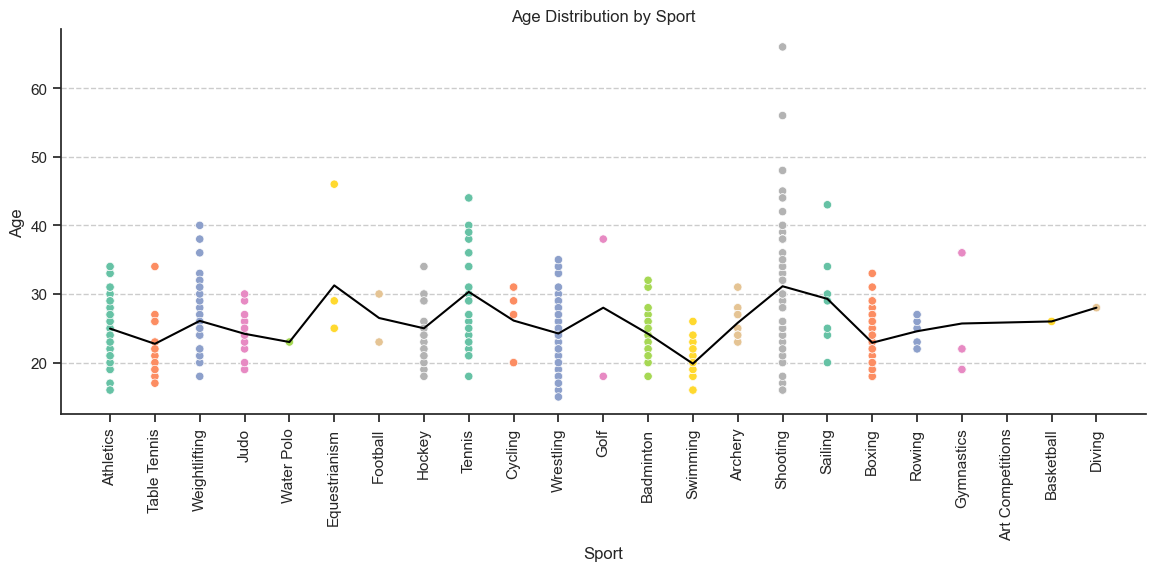

In [56]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=India, x='Sport', y='Age', hue='Sport', palette='Set2', legend=False)
sns.lineplot(data=avg_age, x='Sport', y='Age', color='black')

plt.xlabel('Sport')
plt.ylabel('Age')
plt.title('Age Distribution by Sport')

plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--')


plt.show()

# <p style="text-align: right">[🔝](#top)</p>

### <a id='ind_gen'></a>𝟓.𝟕.𝟑 𝐆𝐞𝐧𝐝𝐞𝐫 𝐰𝐢𝐬𝐞 𝐏𝐚𝐫𝐭𝐢𝐜𝐢𝐩𝐚𝐭𝐢𝐨𝐧

In [57]:
male_ind = athlete_df[(athlete_df['Sex']=='M') & (athlete_df['Country']=='India')].groupby('Year')['Name'].count().reset_index(name='No. of Males')
female_ind = athlete_df[(athlete_df['Sex']=='F') & (athlete_df['Country']=='India')].groupby('Year')['Name'].count().reset_index(name='No. of Females')

In [58]:
gender_ind = pd.merge(male_ind, female_ind)

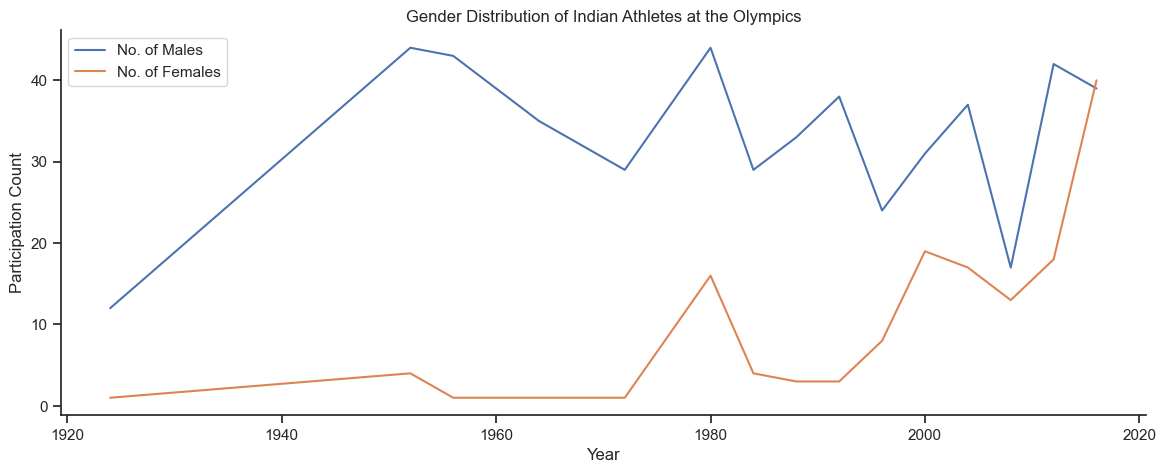

In [59]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=gender_ind, x='Year', y='No. of Males', label='No. of Males')
sns.lineplot(data=gender_ind, x='Year', y='No. of Females', label='No. of Females')

plt.title('Gender Distribution of Indian Athletes at the Olympics')
plt.xlabel('Year')
plt.ylabel('Participation Count')
plt.legend()

plt.show()

<div style="border: 2px solid #333; padding: 15px; margin: 10px 0;">
<ul>
<li>In the early years like 1924 and 1952, there was a significant gap between male and female participation, over the years, there has been a gradual increase in female participation, especially noticeable in the 2000s.

<li>Post the year 2000, the data reflects a significant rise in the number of female athletes, surpassing male participants in some years. 

<li>The year 2016 stands out with a significant increase in female participation, reaching parity with male athletes. This suggests ongoing efforts to encourage and support female athletes in representing India at the Olympics.
</div>

# <p style="text-align: right">[🔝](#top)</p>

## <a id='wc'></a>𝟓.𝟗 𝐖𝐨𝐫𝐝 𝐂𝐥𝐨𝐮𝐝𝐬

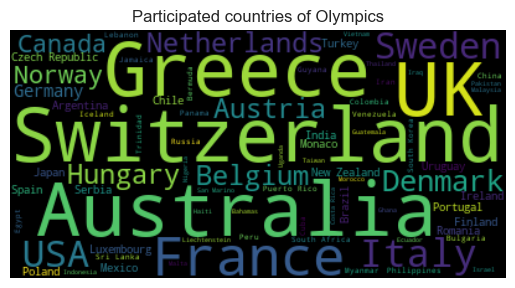

In [60]:
wordcloud = WordCloud().generate_from_frequencies(country_trend.set_index('Country').to_dict()['Count'])

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Participated countries of Olympics')
plt.axis("off")
plt.show()

## <p style="text-align: right">[🔝](#top)</p>
## <a id='lib'></a><div style="background-color: #E6F1FF; padding: 10px; border-radius: 50px; width: 230px;">𝟔. 𝐂𝐨𝐧𝐜𝐥𝐮𝐬𝐢𝐨𝐧

In this comprehensive exploration of the Summer Olympics dataset spanning from 1896 to 2016, we unearthed valuable insights into the evolution, trends, and achievements of this prestigious international sporting event. The analysis covered various dimensions, from historical participation to medal tallies, top-performing athletes, and gender dynamics. Here are the key takeaways:

- ***Historical Evolution:***

    - The Summer Olympics began with 12 participating nations in 1896 and has grown to engage over 200 nations in recent editions.
    - The dip in participation during the 1980 Moscow Olympics boycott impacted 65 nations, highlighting geopolitical influences.

- ***Medal Statistics:***

    - The refinement of our analysis identified and corrected discrepancies in medal counts, offering accurate insights.
    - Top-performing nations, such as the United States, the Soviet Union, and China, have consistently dominated the medal tally with significant counts, e.g., the USA's 2399 total medals.

- ***Participation Trends:***

    -   The visual representation illustrated steady growth, with 43 participating nations in 1896 expanding to more than 200 in recent editions.
    -   Switzerland, Australia, Greece, the United Kingdom, France, and Italy participated in all 29 editions, showcasing enduring commitment.

- ***Top Performers:***

    - Athletes like Larysa Semenivna Latynina, Aleksey Yuryevich Nemov, and Michael Fred Phelps set records with multiple wins, e.g., Phelps' 28 total medals.

- ***Event Trends:***

    - Athletics and Swimming maintained consistent popularity, with Wrestling, Weightlifting, and Judo gaining traction over the years.
    - The heatmap highlighted the distribution of sports events, offering insights into the dynamics of Olympic disciplines.

- ***Popularity and Inclusivity:***

    - The growth in popularity was quantified by the increasing number of athletes, reaching over 5000 in recent editions.
    - The rise in female participation, with notable spikes in 2012 and 2016, reflects ongoing efforts for gender inclusivity.

- ***India's Olympic Journey:***

    - India's initial dominance in field hockey, evident with 14 medals in 1928, transitioned into diversified wins in shooting and badminton.
    - Periods of decline were observed, e.g., a single medal in 1996, 2000, and 2004, but India rebounded with a notable 6 medals in 2012.


### **Conclusion:**

The numerical analysis reaffirms the monumental growth of the Summer Olympics, shaping it into a global spectacle.
As nations anticipate future editions, the data supports the expectation of increased participation, diversity, and continued excellence, fostering the Olympic spirit.
The combination of historical context and numerical insights offers a comprehensive understanding of the Summer Olympics' enduring significance and its impact on the world of sports. The numbers validate the trends, achievements, and the universal appeal of this iconic sporting event. 🏆🌍

<center><img src='https://media1.giphy.com/media/l3vRmI6kBWl4SoJkk/giphy.gif'>
<br>

### Thank you!

</center>